In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv")

In [3]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df["ST_NUM"].isna()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [6]:
df["ST_NUM"].isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
8    False
Name: ST_NUM, dtype: bool

In [7]:
df["NUM_BEDROOMS"]

0      3
1      3
2    NaN
3      1
4      3
5    NaN
6      2
7     --
8     na
Name: NUM_BEDROOMS, dtype: object

In [8]:
df["NUM_BEDROOMS"].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool

In [9]:
missing_values = ["n/a", "na", "--"]

In [10]:
df = pd.read_csv("https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv", na_values = missing_values)

In [11]:
df["NUM_BEDROOMS"]

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

In [12]:
df["NUM_BEDROOMS"].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [13]:
missing_values = ['n/a', 'na', "--", "?", "NA"]
df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv', na_values=missing_values)


In [14]:
df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [15]:
df['NUM_BEDROOMS'].isna()

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7     True
8     True
Name: NUM_BEDROOMS, dtype: bool

In [16]:
df['NUM_BEDROOMS']

0    3.0
1    3.0
2    NaN
3    1.0
4    3.0
5    NaN
6    2.0
7    NaN
8    NaN
Name: NUM_BEDROOMS, dtype: float64

## Unexpected Missing Values

In [17]:
df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

In [18]:
df['OWN_OCCUPIED'].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [19]:
cnt = 0
for row in df['OWN_OCCUPIED']:
    try:
        int(row)
        df.loc[cnt,'OWN_OCCUPIED'] = np.nan
    except ValueError:
        pass
    cnt+=1

In [20]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [21]:
df.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [22]:
df.isna().values.any()

True

In [23]:
df.isnull().sum().sum()

12

In [24]:
df['ST_NUM'].fillna(125, inplace=True)

In [25]:
df.loc[2, 'ST_NUM'] = 125

In [26]:
median = df['NUM_BEDROOMS'].median()
df['NUM_BEDROOMS'].fillna(median, inplace=True)

In [27]:
df.head(9)

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,125.0,LEXINGTON,N,3.0,1,850.0
3,100004000.0,201.0,BERKELEY,NaN,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,3.0,1,800.0
6,100007000.0,125.0,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,3.0,1,NaN
8,100009000.0,215.0,TREMONT,Y,3.0,2,1800.0


## Excel File

In [39]:
%matplotlib inline
data = pd.ExcelFile('data\obes.xls')

In [40]:
data.sheet_names

['Chapter 7',
 '7.1',
 '7.2',
 '7.3',
 '7.4',
 '7.5',
 '7.6',
 '7.7',
 '7.8',
 '7.9',
 '7.10']

In [41]:
data_age = data.parse(u'7.2', skiprows=4, skipfooter=14)

In [42]:
data_age.head

<bound method NDFrame.head of    Unnamed: 0    Total  Under 16  16-24   25-34   35-44   45-54   55-64  \
0         NaN      NaN       NaN    NaN     NaN     NaN     NaN     NaN   
1     2002/03   1275.0     400.0   65.0   136.0   289.0   216.0    94.0   
2     2003/04   1711.0     579.0   67.0   174.0   391.0   273.0   151.0   
3     2004/05   2035.0     547.0  107.0   287.0   487.0   364.0   174.0   
4     2005/06   2564.0     583.0   96.0   341.0   637.0   554.0   258.0   
5     2006/07   3862.0     656.0  184.0   461.0  1069.0   872.0   459.0   
6     2007/08   5018.0     747.0  228.0   564.0  1469.0  1198.0   598.0   
7     2008/09   7988.0     775.0  322.0  1013.0  2359.0  2133.0  1099.0   
8     2009/10  10571.0     632.0  361.0  1348.0  3132.0  3076.0  1555.0   
9     2010/11  11574.0     525.0  375.0  1425.0  3277.0  3573.0  1820.0   
10    2011/12  11736.0     495.0  391.0  1484.0  3104.0  3581.0  2119.0   
11    2012/13  10957.0     556.0  356.0  1437.0  2744.0  3305.0  1965.

In [49]:
data_age.rename(columns={u'Unnamed: 0': u'Year'}, inplace=True)

In [50]:
data_age.dropna(inplace=True)

In [51]:
data_age.set_index('Year', inplace=True)

In [52]:
data_age.head()

,Total,Under 16,16-24,25-34,35-44,45-54,55-64,65-74,75 and over
Year,,,,,,,,,
2002/03,1275.0,400.0,65.0,136.0,289.0,216.0,94.0,52.0,23.0
2003/04,1711.0,579.0,67.0,174.0,391.0,273.0,151.0,52.0,24.0
2004/05,2035.0,547.0,107.0,287.0,487.0,364.0,174.0,36.0,32.0
2005/06,2564.0,583.0,96.0,341.0,637.0,554.0,258.0,72.0,20.0
2006/07,3862.0,656.0,184.0,461.0,1069.0,872.0,459.0,118.0,43.0


<Axes: xlabel='Year'>

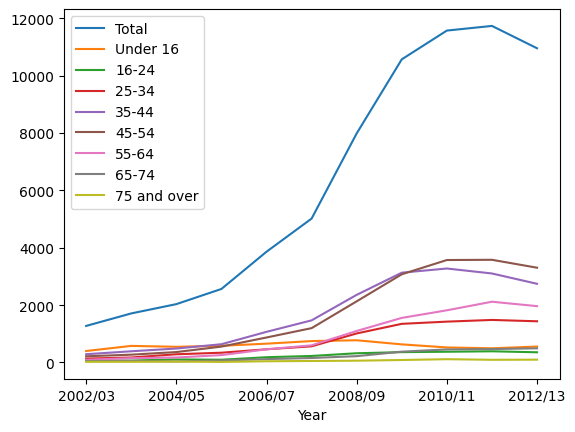

In [53]:
data_age.plot()

In [54]:
data_age_minus_total = data_age.drop('Total', axis=1)

<Axes: xlabel='Year'>

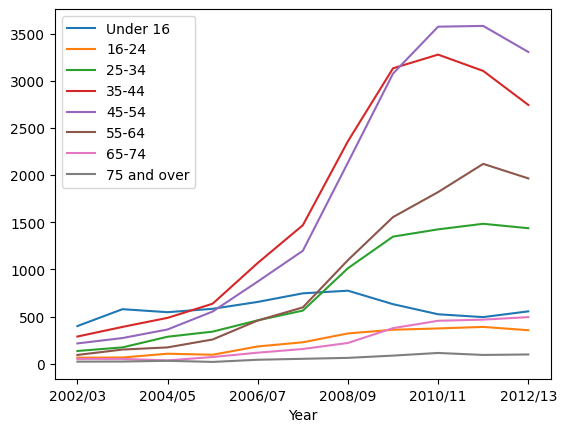

In [55]:
data_age_minus_total.plot()

<Axes: xlabel='Year'>

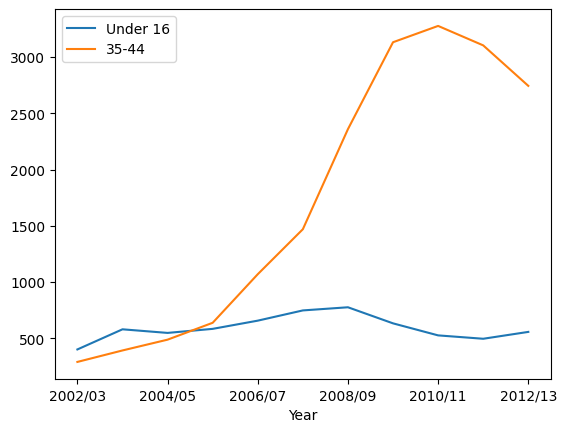

In [56]:
data_age['Under 16'].plot(label="Under 16", legend=True)
data_age['35-44'].plot(label="35-44", legend=True)

In [57]:
from datetime import datetime

In [58]:
date_rng = pd.date_range(start='1/01/2020', end='1/08/2020', freq='H')

In [59]:
date_rng

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq='H')

In [60]:
df = pd.DataFrame(
    date_rng,
    columns=['date']
)

In [61]:
df['data'] = np.random.randint(0,100, size=(len(date_rng)))

In [62]:
df.head()

,date,data
0,2020-01-01 00:00:00,8
1,2020-01-01 01:00:00,79
2,2020-01-01 02:00:00,41
3,2020-01-01 03:00:00,77
4,2020-01-01 04:00:00,34


In [63]:
# buat atribut baru datetime
df['datetime'] = pd.to_datetime(df['date'])
# replacing index
df = df.set_index('datetime')
# drop atribut date
df.drop(['date'],axis=1,inplace=True)

In [64]:
df.head()

,data
datetime,
2020-01-01 00:00:00,8
2020-01-01 01:00:00,79
2020-01-01 02:00:00,41
2020-01-01 03:00:00,77
2020-01-01 04:00:00,34


In [66]:
string_date_range = [str(x) for x in date_rng]

In [67]:
string_date_range

['2020-01-01 00:00:00',
 '2020-01-01 01:00:00',
 '2020-01-01 02:00:00',
 '2020-01-01 03:00:00',
 '2020-01-01 04:00:00',
 '2020-01-01 05:00:00',
 '2020-01-01 06:00:00',
 '2020-01-01 07:00:00',
 '2020-01-01 08:00:00',
 '2020-01-01 09:00:00',
 '2020-01-01 10:00:00',
 '2020-01-01 11:00:00',
 '2020-01-01 12:00:00',
 '2020-01-01 13:00:00',
 '2020-01-01 14:00:00',
 '2020-01-01 15:00:00',
 '2020-01-01 16:00:00',
 '2020-01-01 17:00:00',
 '2020-01-01 18:00:00',
 '2020-01-01 19:00:00',
 '2020-01-01 20:00:00',
 '2020-01-01 21:00:00',
 '2020-01-01 22:00:00',
 '2020-01-01 23:00:00',
 '2020-01-02 00:00:00',
 '2020-01-02 01:00:00',
 '2020-01-02 02:00:00',
 '2020-01-02 03:00:00',
 '2020-01-02 04:00:00',
 '2020-01-02 05:00:00',
 '2020-01-02 06:00:00',
 '2020-01-02 07:00:00',
 '2020-01-02 08:00:00',
 '2020-01-02 09:00:00',
 '2020-01-02 10:00:00',
 '2020-01-02 11:00:00',
 '2020-01-02 12:00:00',
 '2020-01-02 13:00:00',
 '2020-01-02 14:00:00',
 '2020-01-02 15:00:00',
 '2020-01-02 16:00:00',
 '2020-01-02 17:

In [68]:
timestamp_date_range = pd.to_datetime(string_date_range,infer_datetime_format=True)
timestamp_date_range

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 01:00:00',
               '2020-01-01 02:00:00', '2020-01-01 03:00:00',
               '2020-01-01 04:00:00', '2020-01-01 05:00:00',
               '2020-01-01 06:00:00', '2020-01-01 07:00:00',
               '2020-01-01 08:00:00', '2020-01-01 09:00:00',
               ...
               '2020-01-07 15:00:00', '2020-01-07 16:00:00',
               '2020-01-07 17:00:00', '2020-01-07 18:00:00',
               '2020-01-07 19:00:00', '2020-01-07 20:00:00',
               '2020-01-07 21:00:00', '2020-01-07 22:00:00',
               '2020-01-07 23:00:00', '2020-01-08 00:00:00'],
              dtype='datetime64[ns]', length=169, freq=None)

In [69]:
string_date_rng_2 = ['June-01-2020', 'June-02-2020','June-03-2020']
timestamp_date_range_2 = [
    datetime.strptime(x,'%B-%d-%Y') for x in string_date_rng_2
]

In [70]:
timestamp_date_range_2

[datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 6, 2, 0, 0),
 datetime.datetime(2020, 6, 3, 0, 0)]

In [71]:
df2 = pd.DataFrame(timestamp_date_range_2,columns=['date'])

In [72]:
df2

,date
0,2020-06-01
1,2020-06-02
2,2020-06-03


In [73]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,15
2020-01-02 01:00:00,82
2020-01-02 02:00:00,86
2020-01-02 03:00:00,84
2020-01-02 04:00:00,12
2020-01-02 05:00:00,64
2020-01-02 06:00:00,43
2020-01-02 07:00:00,85
2020-01-02 08:00:00,72


In [74]:
df[df.index.day == 2]

,data
datetime,
2020-01-02 00:00:00,15
2020-01-02 01:00:00,82
2020-01-02 02:00:00,86
2020-01-02 03:00:00,84
2020-01-02 04:00:00,12
2020-01-02 05:00:00,64
2020-01-02 06:00:00,43
2020-01-02 07:00:00,85
2020-01-02 08:00:00,72


In [75]:
df['2020-01-03']

C:\Users\ASUS\AppData\Local\Temp\ipykernel_5892\186698106.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df['2020-01-03']


,data
datetime,
2020-01-03 00:00:00,72
2020-01-03 01:00:00,94
2020-01-03 02:00:00,15
2020-01-03 03:00:00,46
2020-01-03 04:00:00,20
2020-01-03 05:00:00,77
2020-01-03 06:00:00,58
2020-01-03 07:00:00,59
2020-01-03 08:00:00,60


In [76]:
df['2020-01-04':'2020-01-06']

,data
datetime,
2020-01-04 00:00:00,16
2020-01-04 01:00:00,27
2020-01-04 02:00:00,69
2020-01-04 03:00:00,73
2020-01-04 04:00:00,93
...,...
2020-01-06 19:00:00,20
2020-01-06 20:00:00,28
2020-01-06 21:00:00,92


In [77]:
df.resample('D').mean()

,data
datetime,
2020-01-01,51.583333
2020-01-02,56.750000
2020-01-03,50.833333
2020-01-04,56.333333
2020-01-05,46.458333
2020-01-06,37.458333
2020-01-07,42.416667
2020-01-08,12.000000


In [78]:
df

,data
datetime,
2020-01-01 00:00:00,8
2020-01-01 01:00:00,79
2020-01-01 02:00:00,41
2020-01-01 03:00:00,77
2020-01-01 04:00:00,34
...,...
2020-01-07 20:00:00,22
2020-01-07 21:00:00,39
2020-01-07 22:00:00,43


In [79]:
df['rolling_sum'] = df.rolling(3).sum()
df.head()

,data,rolling_sum
datetime,,
2020-01-01 00:00:00,8,NaN
2020-01-01 01:00:00,79,NaN
2020-01-01 02:00:00,41,128.0
2020-01-01 03:00:00,77,197.0
2020-01-01 04:00:00,34,152.0


In [80]:
df['rolling_mean'] = df['data'].rolling(3).mean()
df['rolling_sum_backfilled'] = df['rolling_sum'].fillna(method='backfill')
df.head()

,data,rolling_sum,rolling_mean,rolling_sum_backfilled
datetime,,,,
2020-01-01 00:00:00,8,NaN,NaN,128.0
2020-01-01 01:00:00,79,NaN,NaN,128.0
2020-01-01 02:00:00,41,128.0,42.666667,128.0
2020-01-01 03:00:00,77,197.0,65.666667,197.0
2020-01-01 04:00:00,34,152.0,50.666667,152.0


## Real Time Series Dataset
### Import dataset

In [82]:
opsd_df = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',index_col=0,parse_dates=True)
opsd_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [83]:
opsd_df['Year'] = opsd_df.index.year
opsd_df['Month'] = opsd_df.index.month
opsd_df['Weekday'] = opsd_df.index.weekday
opsd_df.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,3


In [84]:
opsd_df.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'Weekday'],
      dtype='object')

<Axes: xlabel='Date'>

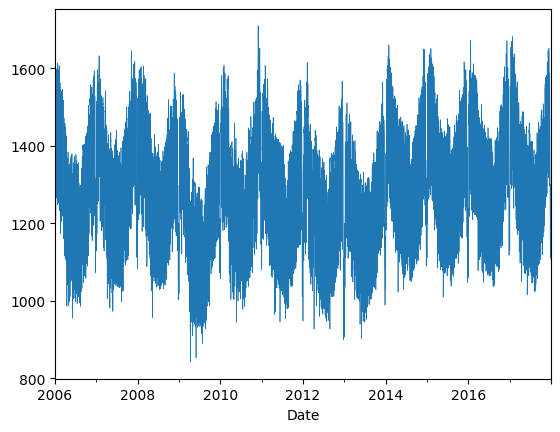

In [85]:
opsd_df['Consumption'].plot(linewidth=0.5)

<Axes: xlabel='Date'>

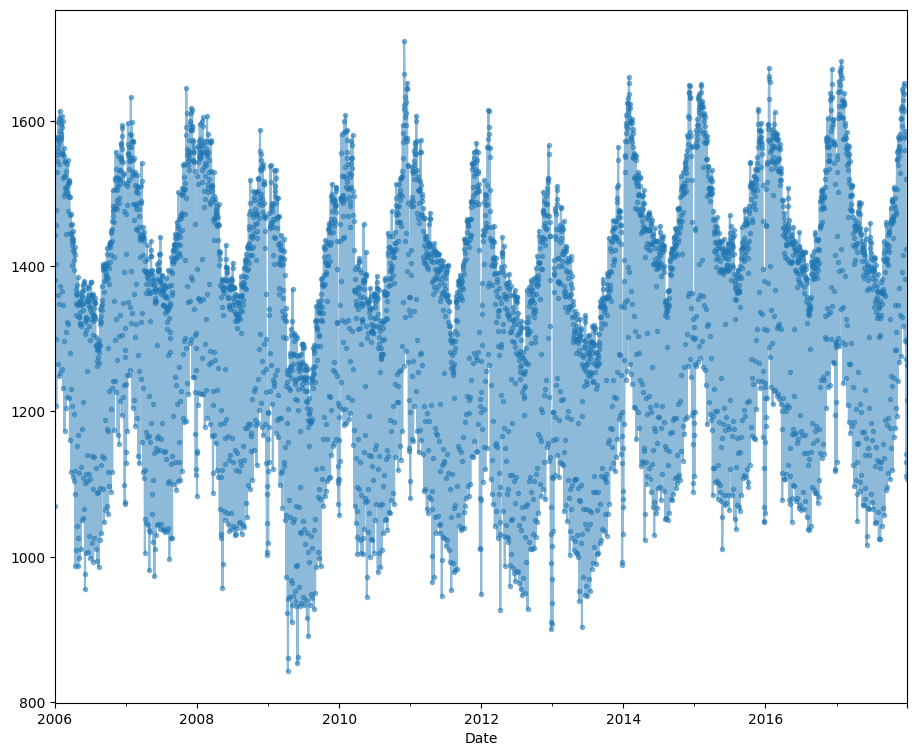

In [86]:
opsd_df['Consumption'].plot(linestyle=None,marker='.',alpha=0.5,figsize=(11,9))

<Axes: xlabel='Date'>

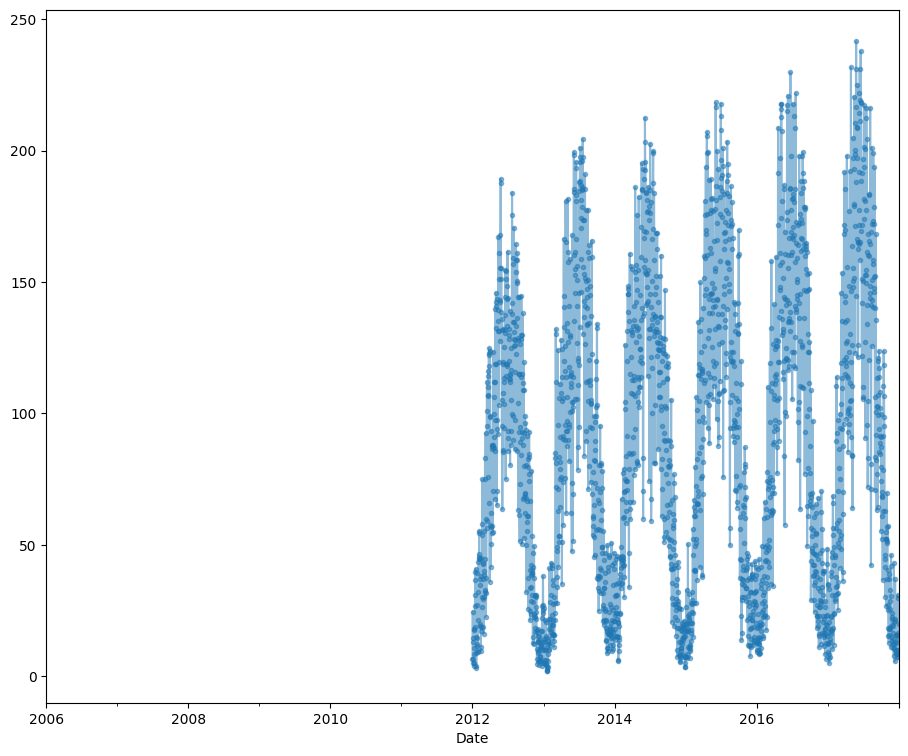

In [87]:
opsd_df['Solar'].plot(linestyle=None,marker='.',alpha=0.5,figsize=(11,9))

<Axes: xlabel='Date'>

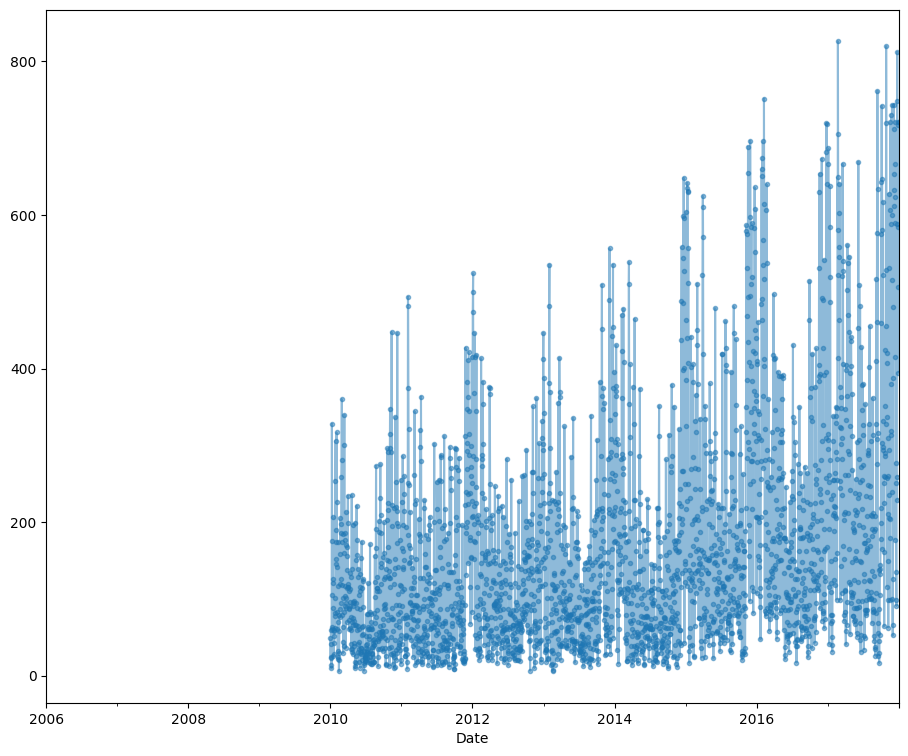

In [88]:
opsd_df['Wind'].plot(linestyle=None,marker='.',alpha=0.5,figsize=(11,9))

Text(0, 0.5, 'Daily Consumption (GWh)')

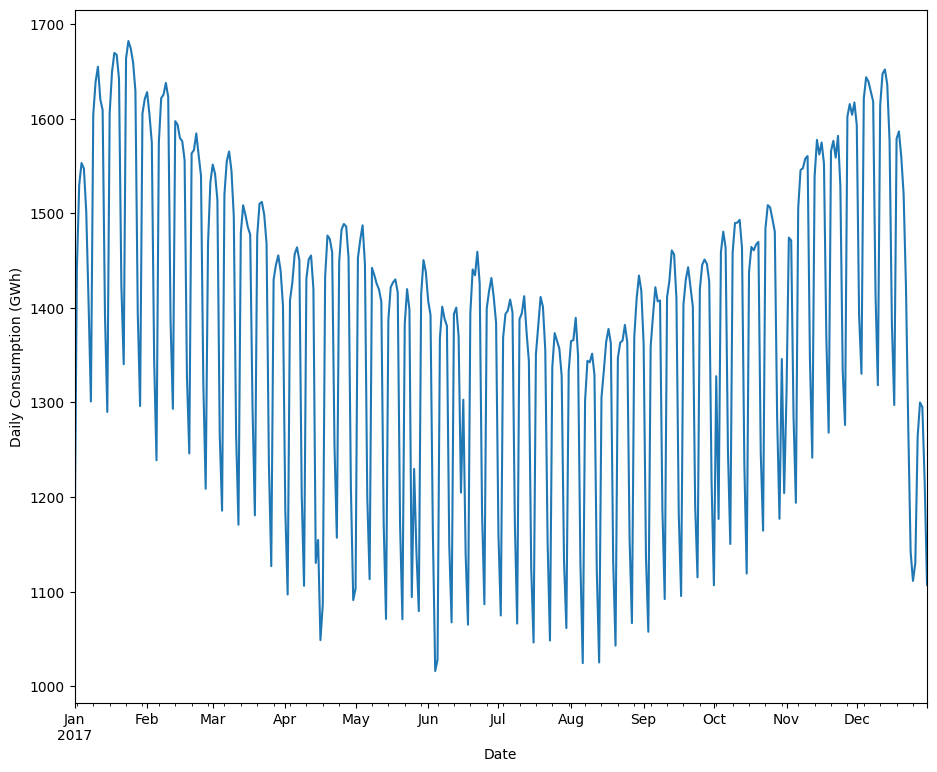

In [89]:
ax = opsd_df.loc['2017','Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWh)')

Text(0, 0.5, 'Daily Consumption (GWh)')

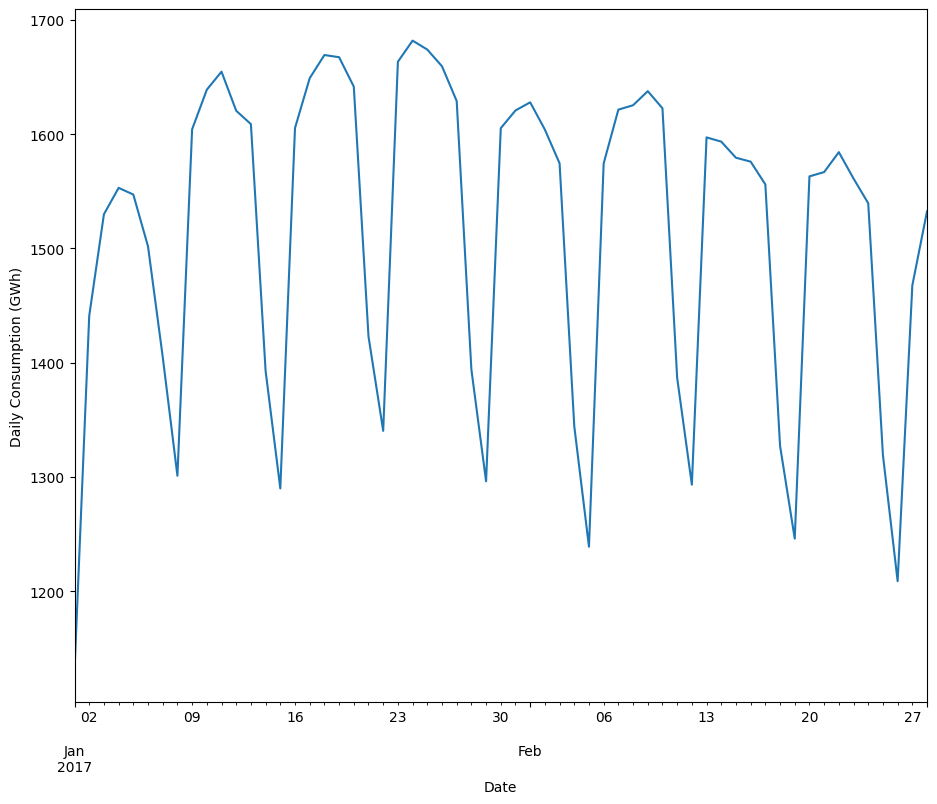

In [90]:
ax = opsd_df.loc['2017-01' :"2017-02",'Consumption'].plot(figsize=(11,9))
ax.set_ylabel('Daily Consumption (GWh)')

<Axes: title={'center': 'Consumption'}, xlabel='Month'>

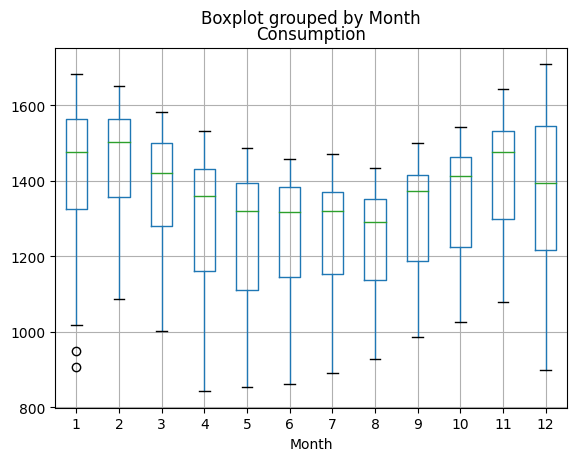

In [91]:
opsd_df.boxplot(column=['Consumption'], by='Month')

<Axes: title={'center': 'Solar'}, xlabel='Month'>

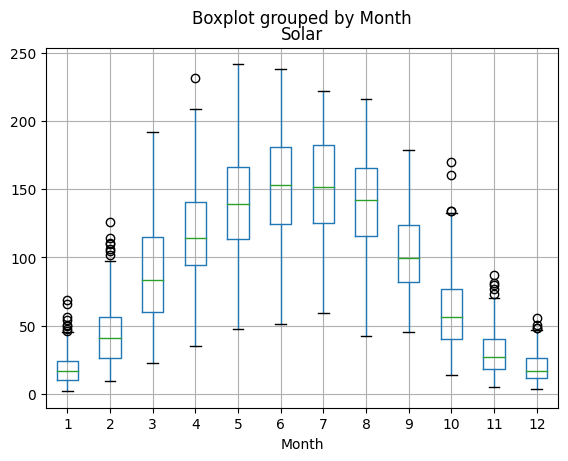

In [92]:
opsd_df.boxplot(column=['Solar'], by='Month')


<Axes: title={'center': 'Wind'}, xlabel='Weekday'>

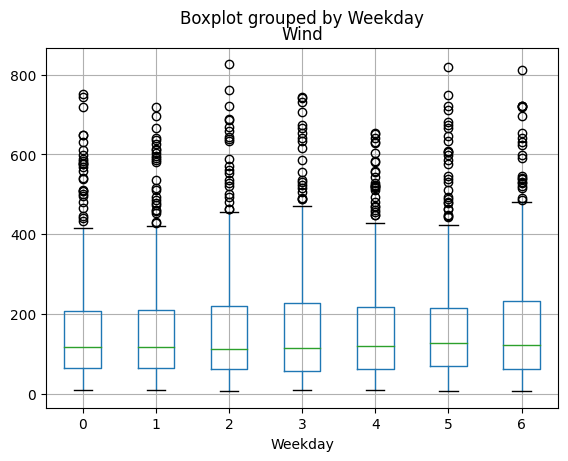

In [93]:
opsd_df.boxplot(column=['Wind'], by='Weekday')

## Resample data menjadi weekly mean time series

<Axes: xlabel='Date'>

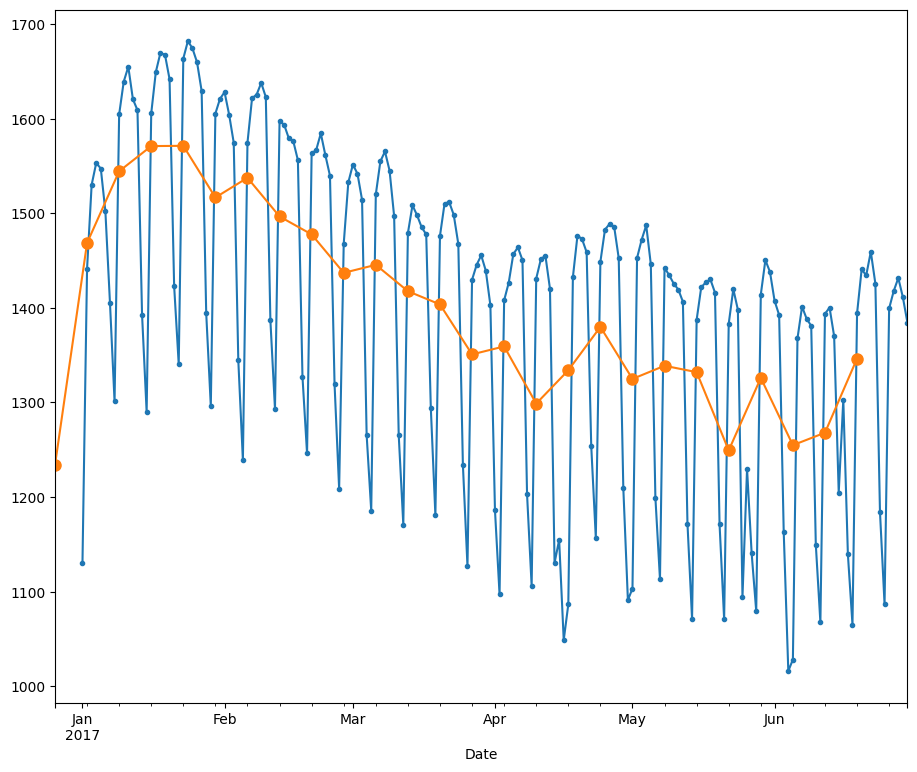

In [94]:
data_columns = ['Consumption','Wind','Solar', 'Wind+Solar']
opsd_df_weekly = opsd_df[data_columns].resample('W').mean()

start, end = '2017-01', '2017-06'

opsd_df.loc[start:end,'Consumption'].plot(marker='.', linestyle='-', figsize=(11,9))
opsd_df_weekly.loc[start:end,'Consumption'].plot(marker='o', linestyle='-',markersize=8, figsize=(11,9))

<Axes: xlabel='Date'>

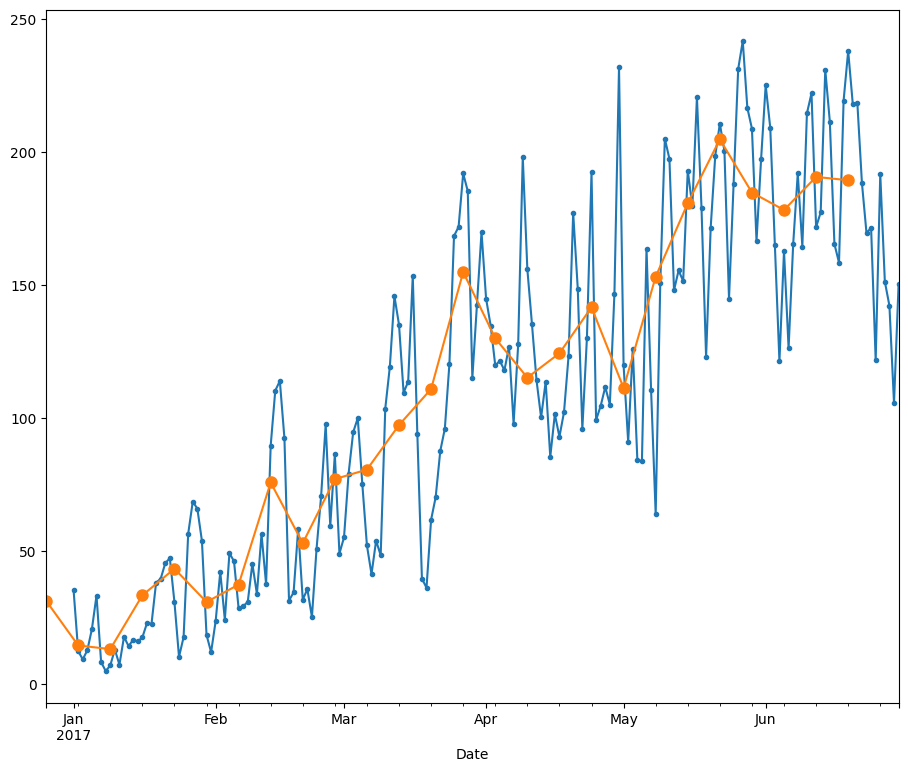

In [95]:
opsd_df.loc[start:end,'Solar'].plot(marker='.', linestyle='-', figsize=(11,9))
opsd_df_weekly.loc[start:end,'Solar'].plot(marker='o', linestyle='-',markersize=8, figsize=(11,9))